<a href="https://colab.research.google.com/github/Happy-Virus-IkBeom/IT_HW4/blob/master/OCR%20algorithm%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

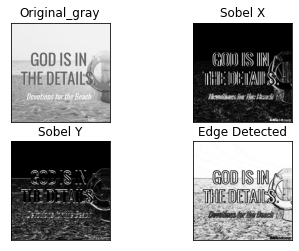

In [ ]:
# IMAGE PROCESSING EXPERIMENT USING OPENCV - Edge Dectection
import cv2  
import numpy as np
from matplotlib import pyplot as plt

img_color= cv2.imread('/content/God_is_in_the_details3.png',cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img_color,1)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)

img_sobel = cv2.addWeighted(sobelx,1, sobely, 1,0)
img_sobel = 255 - img_sobel
cv2.imwrite("/content/IMG_SOBEL.png", img_sobel)
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Original_gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_sobel)
plt.title('Edge Detected'), plt.xticks([]), plt.yticks([])

plt.show()


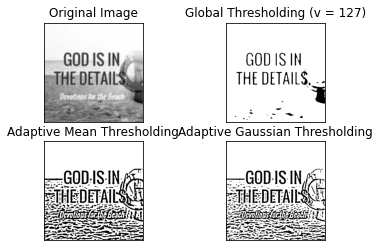

In [ ]:
# IMAGE PROCESSING EXPERIMENT USING OPENCV - Adaptive Gaussian Thresholding
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/God_is_in_the_details3.png',0)
#img = cv.medianBlur(img,5)
img = cv2.GaussianBlur(img, (9,9), 0)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

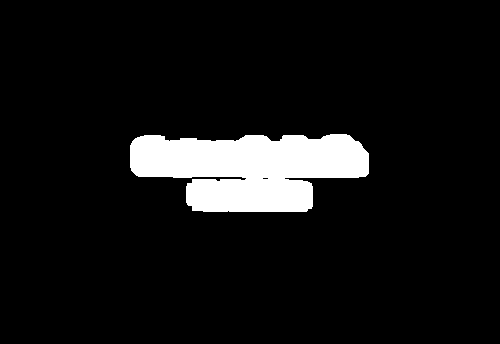

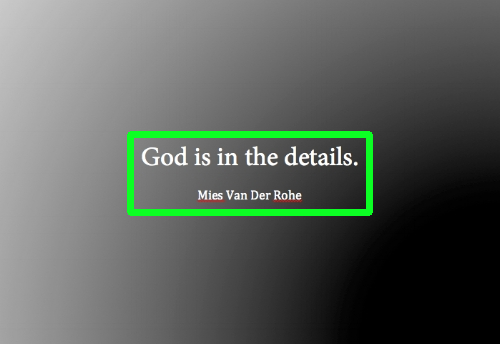

-1

In [ ]:
#MAKING BOX AT PHOTO #1
import cv2  
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, Gaussian blur, adaptive threshold
image = cv2.imread('/content/God_is_in_the_details.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9,9), 0)
#blur = cv.medianBlur(gray,9)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,6)


# Dilate to combine adjacent text contours
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilate = cv2.dilate(thresh, kernel, iterations=2)

# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > 10000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 6)
        ROI = image[y:y+h, x:x+w]
        cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        ROI_number += 1



cv2_imshow(dilate)
cv2_imshow(image)
cv2.waitKey()


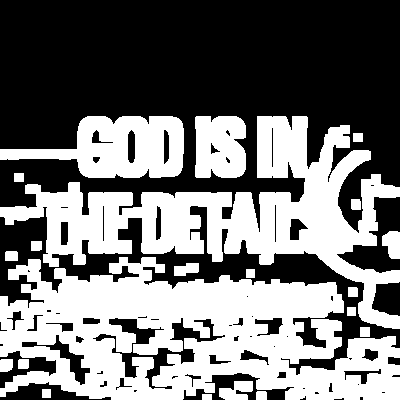

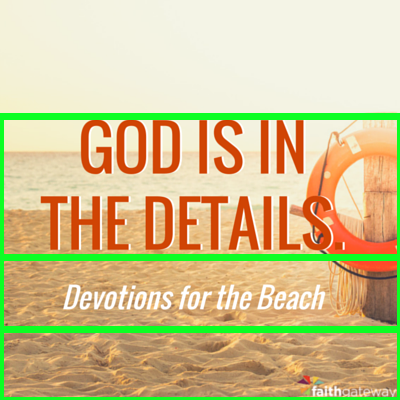

-1

In [ ]:
#MAKING BOX2 AT PHOTO #2 

import cv2  
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, Gaussian blur, adaptive threshold
image = cv2.imread('/content/God_is_in_the_details3.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9,9), 0)
#blur = cv.medianBlur(gray,9)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,6)


# Dilate to combine adjacent text contours

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilate = cv2.dilate(thresh, kernel, iterations=1)

# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > 10000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 6)
        ROI = image[y:y+h, x:x+w]
        cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        ROI_number += 1



cv2_imshow(dilate)
cv2_imshow(image)
cv2.waitKey()


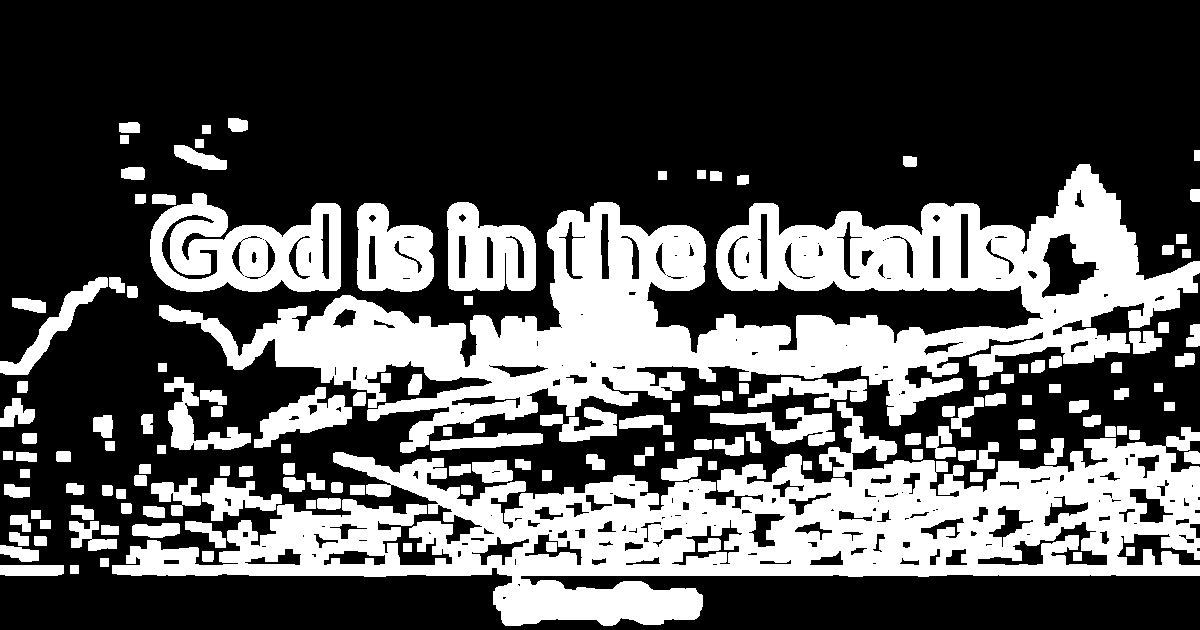

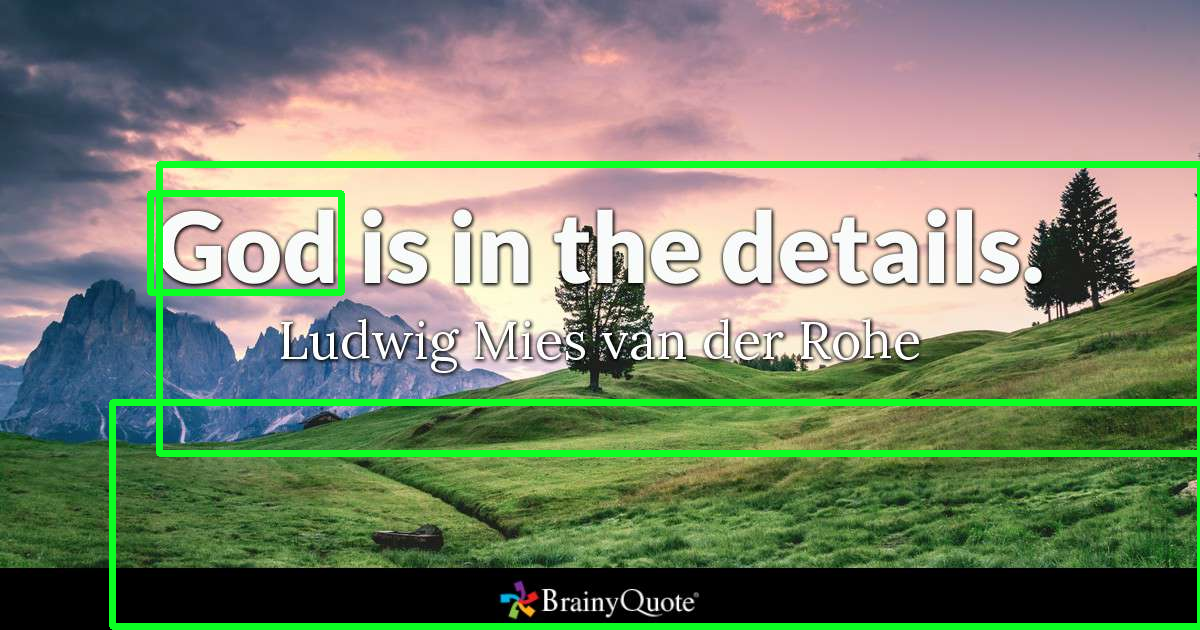

-1

In [ ]:
#MAKING BOX2 AT PHOTO #3 => 나무가 아무래도 문제가 됨. 나무때문에, 성질이 다른 중간의 두문장이 deliation 될때 붙어버리고, 이때문에 box 가 같이 쳐지는 문제 발생.

import cv2  
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, Gaussian blur, adaptive threshold
image = cv2.imread('/content/God_is_in_the_details2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9,9), 0)
#blur = cv.medianBlur(gray,9)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,6)


# Dilate to combine adjacent text contours

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilate = cv2.dilate(thresh, kernel, iterations=1)

# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > 10000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 6)
        ROI = image[y:y+h, x:x+w]
        cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        ROI_number += 1



cv2_imshow(dilate)
cv2_imshow(image)
cv2.waitKey()


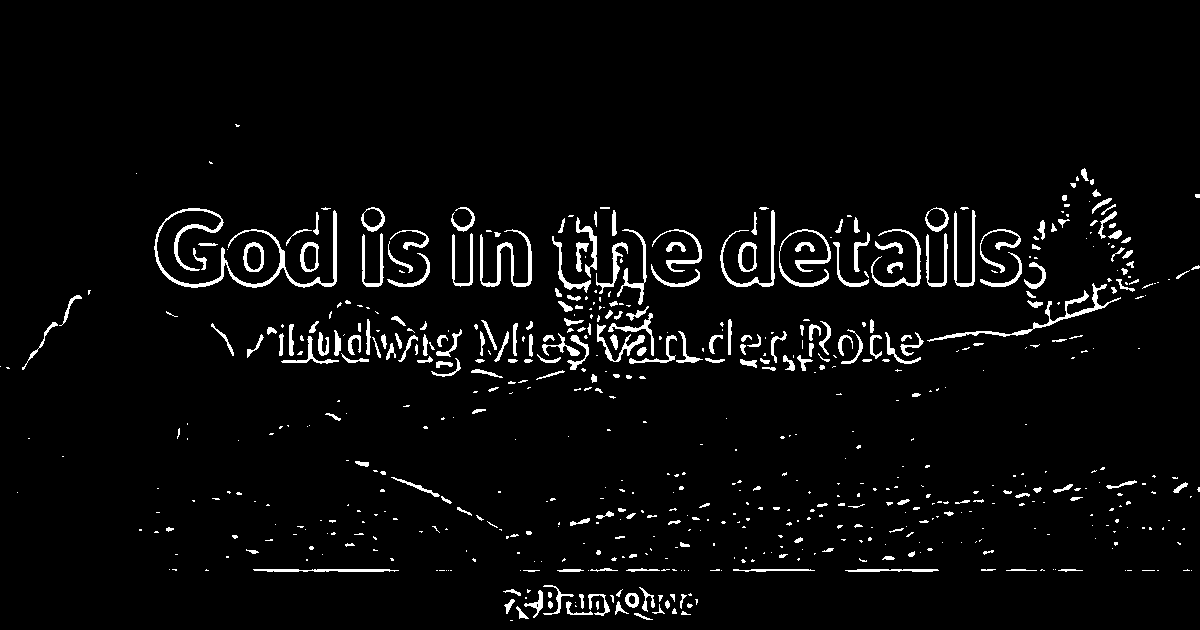

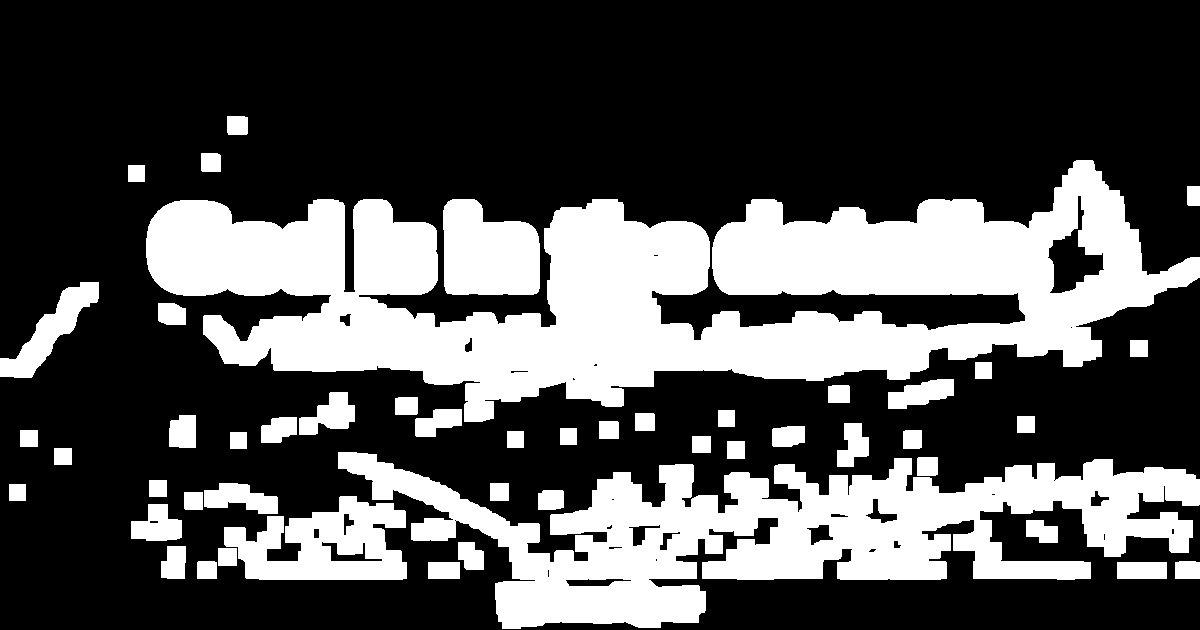

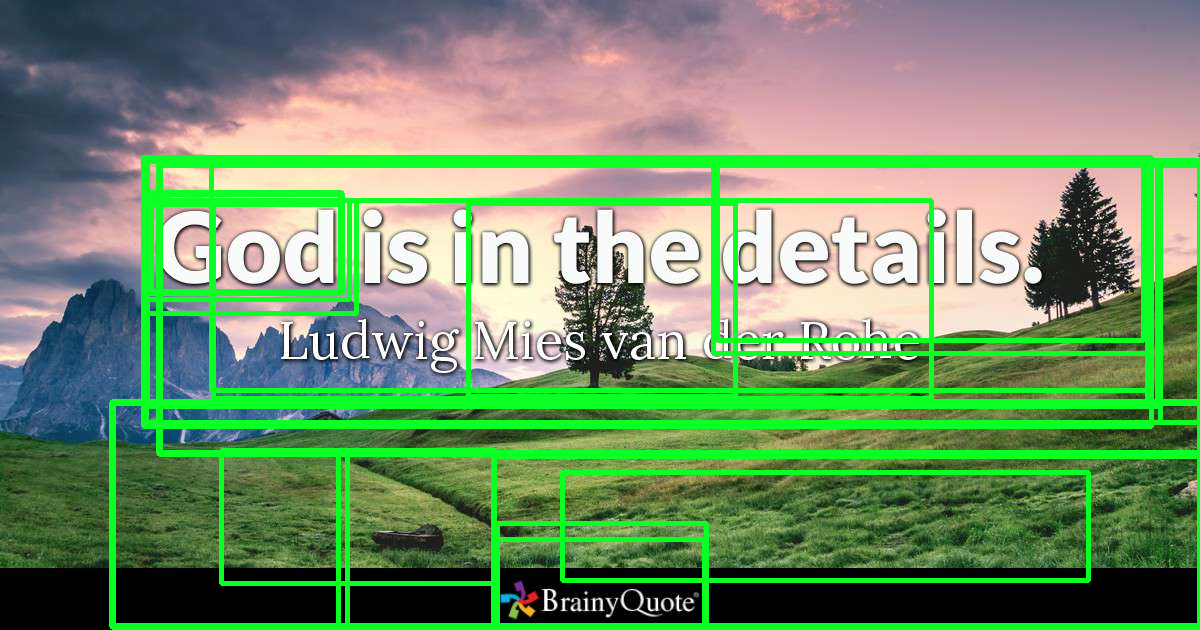

-1

In [ ]:
#Edge Detection + Making Box at photo #2 -> 번외실험 -> 나무때문에 어떤방법을 써도 중간의 두 문장에 box 가 같이 쳐지는 문제 발생.

#Edge Detection
img_color= cv2.imread('/content/God_is_in_the_details2.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img_color,1)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)

img_sobel = cv2.addWeighted(sobelx,1, sobely, 1,0)
img_sobel = 255 - img_sobel

blur = cv2.GaussianBlur(gray, (9,9), 0)
#blur = cv.medianBlur(gray,9)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,13)


# Dilate to combine adjacent text contours
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilate = cv2.dilate(thresh, kernel, iterations=2)

# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > 10000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)
        #ROI = image[y:y+h, x:x+w]
        #cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        #ROI_number += 1


cv2_imshow(thresh)
cv2_imshow(dilate)
cv2_imshow(image)
cv2.waitKey()


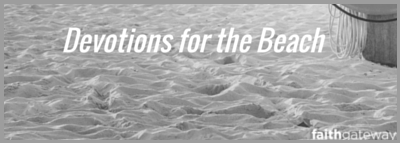

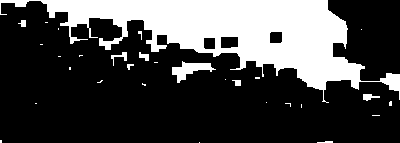

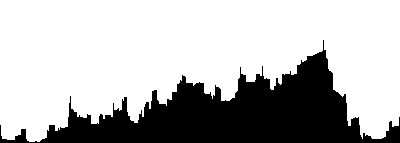

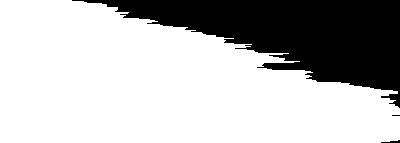

In [ ]:
import cv2
import numpy as numpy
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/ROI_0.png', 0)

height, width = img.shape[:2]
(_, thresh) = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY) 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10)) # morphology processing: defining a rectangular structure
closed = cv2.erode(thresh, kernel, iterations = 1)           # : Iteration 1 times

height, width = closed.shape[:2]
v = [0]*width
z = [0]*height
a = 0

#Vertical projection: Count and store the number of black dots in each column
for x in range(0, width):               
    for y in range(0, height):
        if closed[y,x] == 0:
            a = a + 1
        else :
            continue
    v[x] = a
    a = 0
    
#Create a blank image and draw a vertical projection
l = len(v)
emptyImage = numpy.zeros((height, width, 3), numpy.uint8) 
for x in range(0,width):
    for y in range(0, v[x]):
        b = (255,255,255)
        emptyImage[y,x] = b


# # Count the number of black dots per line
a = 0
emptyImage1 = numpy.zeros((height, width, 3), numpy.uint8) 
for y in range(0, height):
    for x in range(0, width):
        if closed[y,x] == 0:
            a = a + 1
        else :
            continue
    z[y] = a
    a = 0
    
# 
l = len(z)
for y in range(0,height):
    for x in range(0, z[y]):
        b = (255,255,255)
        emptyImage1[y,x] = b

cv2_imshow(img)
cv2_imshow(closed)
cv2_imshow(emptyImage)
cv2_imshow(emptyImage1)
cv2.waitKey(0)
cv2.destroyAllWindows()




........Program Initiated.......


 Resizing Image........
#---------Resized Image Info:--------#
	Height = 1080 
	Width = 1440
#----------------------------#
Applying Adaptive Threshold with kernel :- 21 X 21
Noise Removal From Image.........
Beginning Character Segmentation..............

Given Text has   #  18  #   no. of lines

Average Width of Each Letter:-  34.31428571428572
[[1439, 667, 740, 804, 880, 944, 988, 1027, 1440], [1439, 397, 531, 652, 735, 808, 872, 949, 1029, 1440], [1439, 1029, 1440], [1439, 390, 521, 663, 725, 812, 874, 950, 988, 1029, 1440], [1439, 405, 449, 1440], [1439, 512, 742, 816, 943, 1050, 1440], [1439, 354, 443, 472, 515, 541, 629, 760, 784, 824, 870, 917, 954, 997, 1054, 1100, 1148, 1440], [1439, 352, 401, 443, 470, 522, 579, 656, 733, 781, 822, 873, 991, 1125, 1440], [1439, 505, 527, 1440], [1439, 500, 527, 1440], [1439, 526, 1440], [1439, 496, 526, 1440], [1439, 524, 1440], [1439, 325, 498, 687, 1440], [1439, 689, 1440], [1439, 323, 363, 518, 621, 722

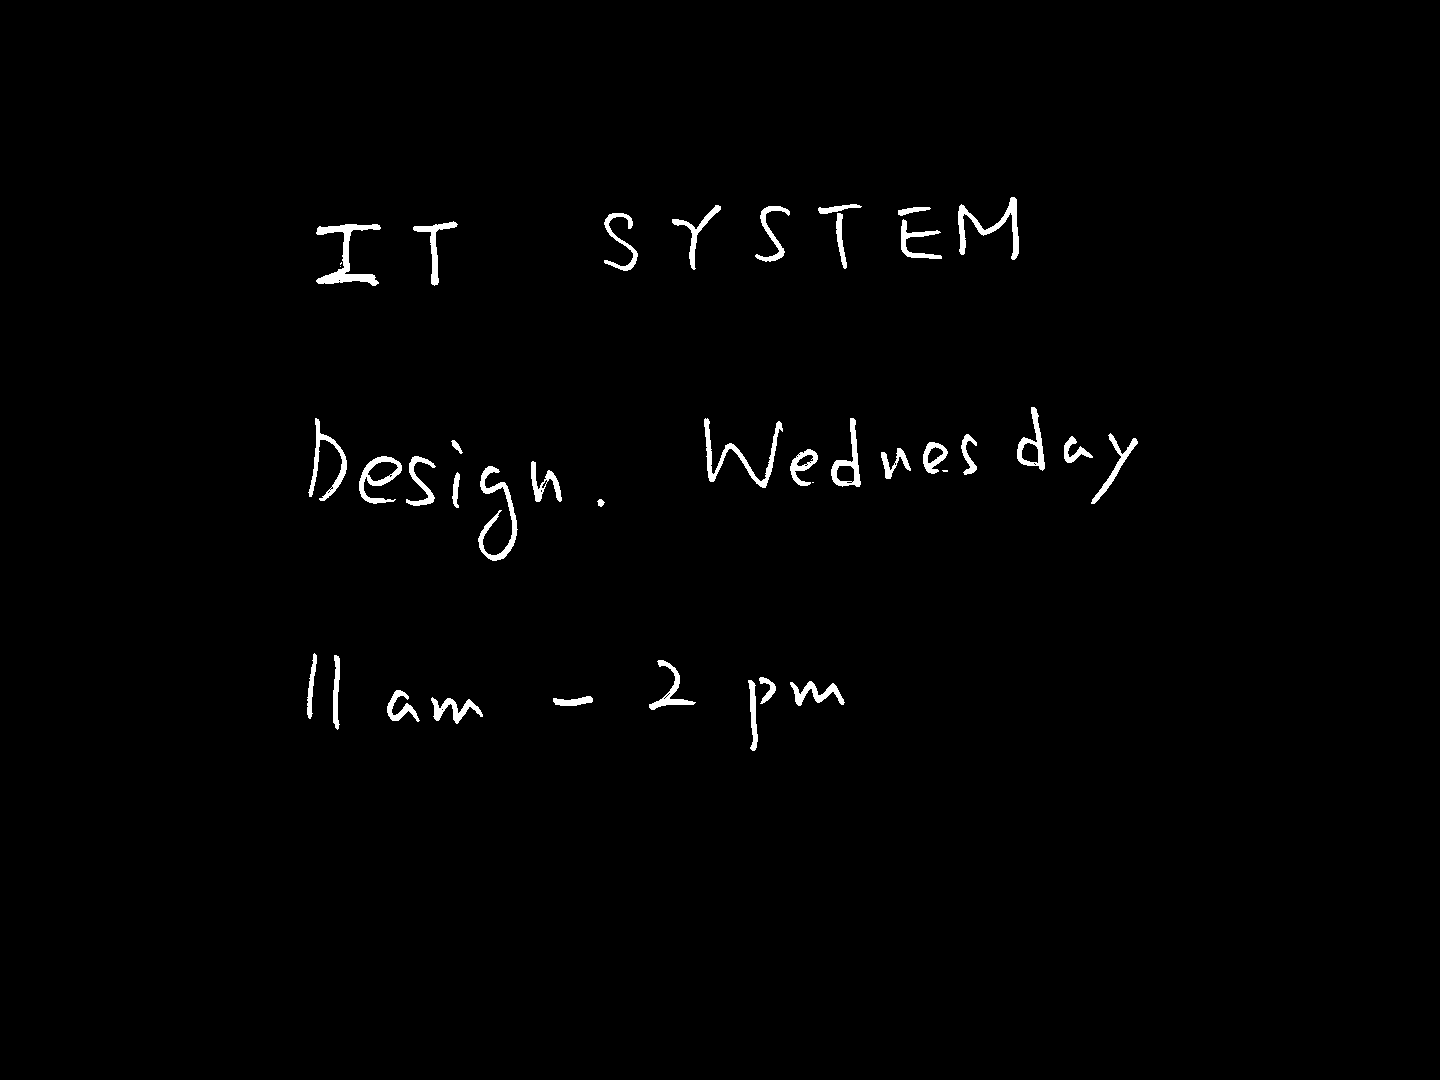

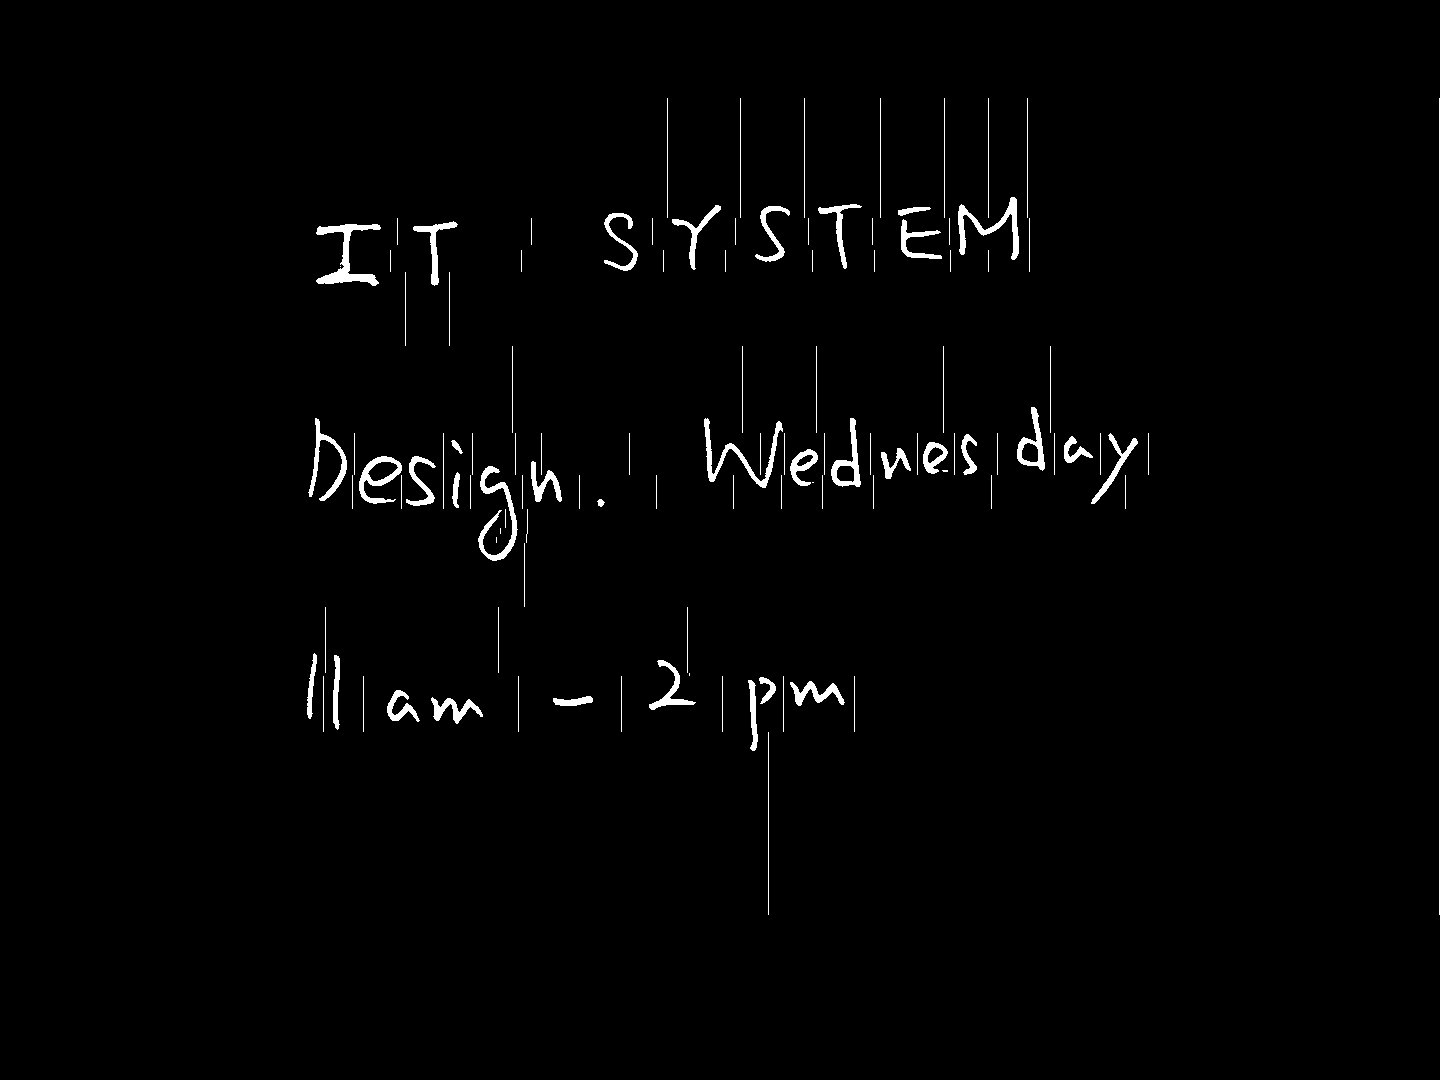

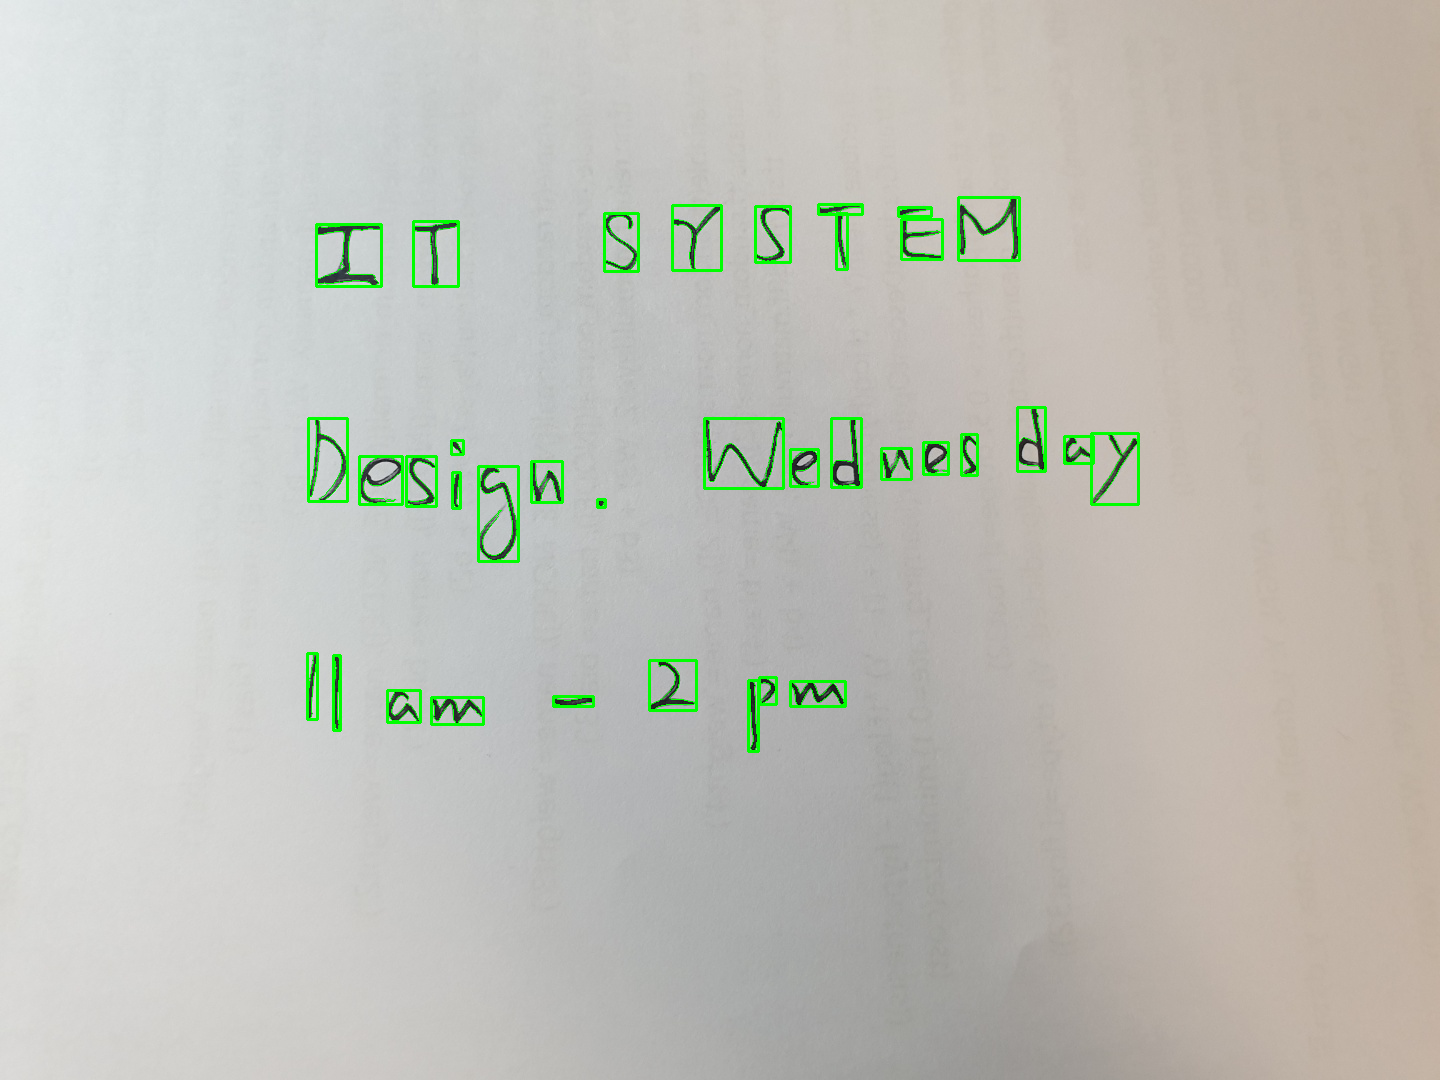

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow
import sys

np.set_printoptions(threshold=sys.maxsize)


def showimages(): # 지금까지의 이미지 과정들 출력
    cv2_imshow(bin_img)  # Binary Image
    cv2_imshow(final_thr) # Threshold Image
    cv2_imshow(src_img)  # Source Image
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def line_array(array): # list x 의 최소값 상한값 반환
    list_x_upper = []
    list_x_lower = []
    for y in range(5, len(array)-5):
        s_a, s_p = strtline(y, array)
        e_a, e_p = endline(y, array)
        print(str(s_a) + ',' + str(s_p) + ',' + str(e_a) + ',' + str(e_p) + ',' + str(y))
        if s_a>=7 and s_p>=5:
            list_x_upper.append(y)
        # bin_img[y][:] = 255
        if e_a>=5 and e_p>=7:
            list_x_lower.append(y)
            # bin_img[y][:] = 255
    return list_x_upper, list_x_lower

def strtline(y, array): 
    count_ahead = 0
    count_prev = 0
    for i in array[y:y+10]:
        if i > 3:
            count_ahead+= 1  
    for i in array[y-10:y]:
        if i == 0:
            count_prev += 1  
    return count_ahead, count_prev

def endline(y, array):
    count_ahead = 0
    count_prev = 0
    for i in array[y:y+10]:
        if i==0:
            count_ahead+= 1  
    for i in array[y-10:y]:
        if i >3:
            count_prev += 1  
    return count_ahead, count_prev

def endline_word(y, array, a):
    count_ahead = 0
    count_prev = 0
    for i in array[y:y+2*a]:
        if i < 2:
            count_ahead+= 1  
    for i in array[y-a:y]:
        if i > 2:
            count_prev += 1  
    return count_prev ,count_ahead

def end_line_array(array, a):
    list_endlines = []
    for y in range(len(array)):
        e_p, e_a = endline_word(y, array, a)
        #print(e_p, e_a)
        if e_a >= int(0.8*a) and e_p >= int(0.7*a):
            list_endlines.append(y)
    return list_endlines

def refine_endword(array):
    refine_list = []
    for y in range(len(array)-1):
        if array[y]+1 < array[y+1]:
            refine_list.append(array[y])
    refine_list.append(array[-1])
    return refine_list


def refine_array(array_upper, array_lower):
    upperlines = []
    lowerlines = []
    for y in range(len(array_upper)-1):
        if array_upper[y] + 5 < array_upper[y+1]:
            upperlines.append(array_upper[y]-10)
    for y in range(len(array_lower)-1):
        if array_lower[y] + 5 < array_lower[y+1]:
            lowerlines.append(array_lower[y]+10)

    upperlines.append(array_upper[-1]-10)
    lowerlines.append(array_lower[-1]+10)
    
    return upperlines, lowerlines

def letter_width(contours):
    letter_width_sum = 0
    count = 0
    for cnt in contours:
        if cv2.contourArea(cnt) > 20:
            x,y,w,h = cv2.boundingRect(cnt)
            letter_width_sum += w
            count += 1

    return letter_width_sum/count


def end_wrd_dtct(final_local, i, bin_img, mean_lttr_width):
    count_y = np.zeros(shape = width)
    for x in range(width):
        for y in range(final_local[i],final_local[i+1]):
            if bin_img[y][x] == 255:
                count_y[x] += 1
    #end_lines = end_line_array(count_y, int(mean_lttr_width))
    #endlines = refine_endword(end_lines)
    #print(i)
    '''for x in range(len(count_y)):
        if max(count_y[0:x+1]) >= 3 and max(count_y[x:]) >= 3 and (20-np.count_nonzero(count_y[x-10:x+10])) > 6:
            print(x)'''

    contours, hierarchy = cv2.findContours(lines_img[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    letter_width_sum = 0
    count = 0
    for cnt in contours:
        if cv2.contourArea(cnt) > 20:
            x, y, w, h = cv2.boundingRect(cnt)
            letter_width_sum += w
            count += 1
    if count != 0 :
        mean_width = letter_width_sum / count
    else:
        mean_width = 0
    #print(mean_width)
    spaces = []
    line_end = []
    for x in range(len(count_y)):
        number = int(0.5*int(mean_width)) - np.count_nonzero(count_y[x-int(0.25*int(mean_width)):x+int(0.25*int(mean_width))])
        if max(count_y[0:x + 1]) >= 3 and number >= 0.4*int(mean_width):
            spaces.append(x)
        if max(count_y[x:]) <= 2:
            line_end.append(x)
    true_line_end = min(line_end) + 10
    #spaces = refine_endword(spaces)
    #print(spaces)
    #print(true_line_end)
    reti = []
    final_spaces = []
    for j in range(len(spaces)):
        if spaces[j] < true_line_end:
            if spaces[j] == spaces[j-1] + 1:
                reti.append(spaces[j-1])
            elif spaces[j] != spaces[j-1] + 1 and spaces[j-1] == spaces[j-2] +1:
                reti.append(spaces[j-1])
                retiavg = int(sum(reti)/len(reti))
                final_spaces.append(retiavg)
                reti = []
            elif spaces[j] != spaces[j-1] + 1 and spaces[j-1] != spaces[j-2] +1 and spaces[j] != spaces[j+1] -1:
                final_spaces.append(spaces[j])
        elif spaces[j] == true_line_end:
            final_spaces.append(true_line_end)
    #print(final_spaces)
    for x in final_spaces:
        final_thr[final_local[i]:final_local[i+1], x] = 255
    return final_spaces


def letter_seg(lines_img, x_lines, i):
    copy_img = lines_img[i].copy()
    x_linescopy = x_lines[i].copy()
    
    letter_img = []
    letter_k = []
    
    contours, hierarchy = cv2.findContours(copy_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)   
    for cnt in contours:
        if cv2.contourArea(cnt) > 5:
            x,y,w,h = cv2.boundingRect(cnt)
            # letter_img.append(lines_img[i][y:y+h, x:x+w])
            letter_k.append((x,y,w,h))

    letter_width_sum = 0
    count = 0
    for cnt in contours:
        if cv2.contourArea(cnt) > 20:
            x, y, w, h = cv2.boundingRect(cnt)
            letter_width_sum += h
            count += 1

    #mean_height = letter_width_sum/count

    letter = sorted(letter_k, key=lambda student: student[0])

    for e in range(len(letter)):
        if e < len(letter)-1:
            if abs(letter[e][0] - letter[e+1][0]) <= 2:
                x,y,w,h = letter[e]
                x2,y2,w2,h2 = letter[e+1]
                if h >= h2:
                    letter[e] = (x,y2,w,h+h2)
                    letter.pop(e+1)
                elif h < h2:
                    letter[e+1] = (x2,y,w2,h+h2)
                    letter.pop(e)

    for e in range(len(letter)):
        letter_img_tmp = lines_img[i][letter[e][1]-0:letter[e][1]+letter[e][3]+0,letter[e][0]-0:letter[e][0]+letter[e][2]+0]
        letter_img_tmp = cv2.resize(letter_img_tmp, dsize=(28, 28), interpolation=cv2.INTER_AREA)
        width = letter_img_tmp.shape[1]
        height = letter_img_tmp.shape[0]
        count_y = np.zeros(shape=(width))
        for x in range(width):
            for y in range(height):
                if letter_img_tmp[y][x] == 255:
                    count_y[x] = count_y[x] +1
        print(count_y)
        max_list = []
        for z in range(len(count_y)):
            if z>=5 and z<= len(count_y)-6:
                if max(count_y[z-5:z+6]) == count_y[z] and count_y[z] >= 2:
                    max_list.append(z)
            elif z<5:
                if max(count_y[0:z+6]) == count_y[z] and count_y[z] >= 2:
                    max_list.append(z)
            elif z > len(count_y)-6:
                if max(count_y[z-5:len(count_y)-1]) == count_y[z] and count_y[z] >= 2:
                    max_list.append(z)
        print(max_list)
        rem_list = []
        final_max_list = []
        for z in range(len(max_list)):
            if z > 0:
                if max_list[z]-max_list[z-1] <= 3:
                    rem_list.append(z-1)
        for z in range(len(max_list)):
            if z not in rem_list:
                final_max_list.append(max_list[z])
        print(final_max_list)
        if len(final_max_list) <= 1:
            print(False)
        else:
            max_len = len(final_max_list) - 1
            for j in range(max_len):
                list = count_y[final_max_list[j]:final_max_list[j+1]]
                min_list = sorted(list)[:3]
                avg = sum(min_list)/len(min_list)
                print(avg)



    x_linescopy.pop(0)
    word = 1
    letter_index = 0
    for e in range(len(letter)):
        #print(str(letter[e][0]) + ',' + str(letter[e][1]) + ',' + str(letter[e][2]) + ',' + str(letter[e][3]) + ',' + str(e))
        if(letter[e][0]<x_linescopy[0]):
            letter_index += 1
            letter_img_tmp = lines_img[i][letter[e][1]-0:letter[e][1]+letter[e][3]+5,letter[e][0]-2:letter[e][0]+letter[e][2]+2]
            letter_img = cv2.resize(letter_img_tmp, dsize =(28, 28), interpolation = cv2.INTER_AREA)
            cv2.imwrite('img1/'+str(i+1)+'_'+str(word)+'_'+str(letter_index)+'.jpg', 255-letter_img)
        else:
            x_linescopy.pop(0)
            word += 1
            letter_index = 1
            letter_img_tmp = lines_img[i][letter[e][1]-0:letter[e][1]+letter[e][3]+5,letter[e][0]-2:letter[e][0]+letter[e][2]+2]
            letter_img = cv2.resize(letter_img_tmp, dsize =(28, 28), interpolation = cv2.INTER_AREA)
            cv2.imwrite('img1/'+str(i+1)+'_'+str(word)+'_'+str(letter_index)+'.jpg', 255-letter_img)
            # print(letter[e][0],x_linescopy[0], word)


print("\n........Program Initiated.......\n")
src_img= cv2.imread('/content/IT.jpg', 1) # Image Read, Color Read
copy = src_img.copy() # Shallow Copy
height = src_img.shape[0] # 행의 개수(length)
width = src_img.shape[1] # 열의 개수(length)

print("\n Resizing Image........")
src_img = cv2.resize(copy, dsize =(1440, int(1440*height/width)), interpolation = cv2.INTER_AREA) # resizing

height = src_img.shape[0] # Resized 행의 개수(length)
width = src_img.shape[1]  # Resized 열의 개수(length)

print("#---------Resized Image Info:--------#")
print("\tHeight =",height,"\n\tWidth =",width)
print("#----------------------------#")

grey_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY) # BGR to Gray

print("Applying Adaptive Threshold with kernel :- 21 X 21")
bin_img = cv2.adaptiveThreshold(grey_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,21,20) # Adaptive Threshold 적용
coords = np.column_stack(np.where(bin_img > 0)) # bin_img > 0 인값만 반환하여 column 방향으로 stack 하여 2차원 array 형성
angle = cv2.minAreaRect(coords)[-1] # 물체의 회전을 고려한 rectangular 사각형
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle
h = bin_img.shape[0]
w = bin_img.shape[1]
center = (w//2,h//2) # Centor 정중앙
angle = 0
M = cv2.getRotationMatrix2D(center,angle,1.0)
bin_img = cv2.warpAffine(bin_img,M,(w,h),
                         flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE) # bin_img : 변경될 이미지 M: 변경 matrix, 출력될 이미지 (w,h)

bin_img1 = bin_img.copy()
bin_img2 = bin_img.copy() # shallow copy

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) # 타원형 kernel 생성
kernel1 = np.array([[1,0,1],[0,1,0],[1,0,1]], dtype = np.uint8)
# final_thr = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
# final_thr = cv2.dilate(bin_img,kernel1,iterations = 1)
print("Noise Removal From Image.........")
final_thr = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel) # noise 제거
contr_retrival = final_thr.copy() # shallow copy


print("Beginning Character Segmentation..............") ## Character Segmentation
count_x = np.zeros(shape= (height))
for y in range(height):
    for x in range(width):
        if bin_img[y][x] == 255 :
            count_x[y] = count_x[y]+1

local_minima = []
for y in range(len(count_x)):
    if y >= 10 and y <= len(count_x)-11:
        arr1 = count_x[y-10:y+10]
    elif y < 10:
        arr1 = count_x[0:y+10]
    else:
        arr1 = count_x[y-10:len(count_x)-1]
    if min(arr1) == count_x[y]:
        local_minima.append(y)

final_local = []
init = []
end = []
for z in range(len(local_minima)):
    if z != 0 and z!= len(local_minima)-1:
        if local_minima[z] != (local_minima[z-1] +1) and local_minima[z] != (local_minima[z+1] -1):
            final_local.append(local_minima[z])
        elif local_minima[z] != (local_minima[z-1] + 1) and local_minima[z] == (local_minima[z+1] -1):
            init.append(local_minima[z])
        elif local_minima[z] == (local_minima[z-1] + 1) and local_minima[z] != (local_minima[z+1] -1):
            end.append(local_minima[z])
    elif z == 0:
        if local_minima[z] != (local_minima[z+1]-1):
            final_local.append(local_minima[z])
        elif local_minima[z] == (local_minima[z+1]-1):
            init.append(local_minima[z])
    elif z == len(local_minima)-1:
        if local_minima[z] != (local_minima[z-1]+1):
            final_local.append(local_minima[z])
        elif local_minima[z] == (local_minima[z-1]+1):
            end.append(local_minima[z])
for j in range(len(init)):
    mid = (init[j] + end[j])/2
    if (mid % 1) != 0:
        mid = mid+0.5
    final_local.append(int(mid))

final_local = sorted(final_local)

no_of_lines = len(final_local) - 1

print("\nGiven Text has   # ",no_of_lines, " #   no. of lines")

lines_img = []

for i in range(no_of_lines):
    lines_img.append(bin_img2[final_local[i]:final_local[i+1], :])

contours, hierarchy = cv2.findContours(contr_retrival,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
final_contr = np.zeros((final_thr.shape[0],final_thr.shape[1],3), dtype = np.uint8)
cv2.drawContours(src_img, contours, -1, (0,255,0), 1)

mean_lttr_width = letter_width(contours)
print("\nAverage Width of Each Letter:- ", mean_lttr_width)


x_lines = []

for i in range(len(lines_img)):
    x_lines.append(end_wrd_dtct(final_local, i, bin_img, mean_lttr_width))

for i in range(len(x_lines)):
    x_lines[i].append(width)

print(x_lines)
#-------------/Word Detection-----------------#

#-------------Letter Segmentation-------------#

cv2.waitKey(0)
for i in range(no_of_lines):
    letter_seg(lines_img, x_lines, i)   


chr_img = bin_img1.copy()

contours, hierarchy = cv2.findContours(chr_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# print(len(contours))
# final_contr = np.zeros((final_thr.shape[0],final_thr.shape[1],3), dtype = np.uint8)
# cv2.drawContours(src_img, contours, -1, (0,255,0), 1)

for cnt in contours:
    if cv2.contourArea(cnt) > 20:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(src_img,(x,y),(x+w,y+h),(0,255,0),2)


showimages()

In [4]:
pip install tensorflow==1.5.0

     |████████████████████████████████| 44.4MB 102kB/s 
     |████████████████████████████████| 3.0MB 39.5MB/s 
     |████████████████████████████████| 890kB 37.6MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=18a8495bd91c199656e71e46bb342ebc3413b7cac8e706848470d92df0c4df9d
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [8]:
pip install opencv-python==3.4.0.14

In [9]:
pip list

Package                  Version        
------------------------ ---------------
absl-py                  0.9.0          
alabaster                0.7.12         
albumentations           0.1.12         
altair                   4.1.0          
asgiref                  3.2.10         
astor                    0.8.1          
astropy                  4.0.1.post1    
astunparse               1.6.3          
atari-py                 0.2.6          
atomicwrites             1.4.0          
attrs                    19.3.0         
audioread                2.1.8          
autograd                 1.3            
Babel                    2.8.0          
backcall                 0.2.0          
beautifulsoup4           4.6.3          
bleach                   1.5.0          
blis                     0.4.1          
bokeh                    1.4.0          
boto                     2.49.0         
boto3                    1.14.9         
botocore                 1.17.9         
Bottleneck      